In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import lasso_path
from itertools import cycle

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/lasso-covid19India-state-testing-data.csv')
df.head()

,State,Confirmed,Active,Recovered,Deceased,Population,Male,Female,Sex Ratio,Men whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2) (%),...,Women Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%),Women who are literate (%),Households with electricity (%),Households with an improved drinking-water source1 (%),Households using improved sanitation facility2 (%),Households using clean fuel for cooking3 (%),Households using iodized salt (%),Households with any usual member covered by a health scheme or health insurance (%),State.1,Number of Tests
0,Uttar Pradesh,150023,46847,100731,2445,182113269,95193639,86919630,0.913082,25.401911,...,0.577361,61.411184,72.163914,96.462942,34.849933,32.480647,94.021779,6.275779,Uttar Pradesh,0
1,Gujarat,75911,13425,59750,2736,55108127,28763577,26344550,0.915900,24.562610,...,0.760804,73.452981,96.295217,90.530453,65.623205,54.044675,95.308717,22.783178,Gujarat,577500
2,Maharashtra,592706,149751,422524,20119,101944429,52670405,49274024,0.935516,20.103454,...,0.646409,79.840107,92.389130,90.615397,53.732060,55.936843,96.197247,15.189607,Maharashtra,1223019
3,Rajasthan,60872,13745,46274,853,58876911,30558858,28318053,0.926672,22.467019,...,0.547274,56.972231,91.812570,85.287108,45.931627,33.666668,93.596093,19.817530,Rajasthan,1760006
4,Kerala,37651,13681,23754,163,25497770,12183437,13314333,1.092822,8.702269,...,0.597407,98.228703,99.268759,94.455200,98.478524,58.588003,98.446967,46.612805,Kerala,294142


In [3]:
def add_avg(df):
    m = ['Men whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2) (%)',
         'Men who are overweight or obese (BMI ≥ 25.0 kg/m2) (%)',
         'Men age 15-49 years who are anaemic (<13.0 g/dl) (%)',
         'Men Blood sugar level - high (>140 mg/dl) (%)',
         'Men Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%)']

    f = ['Women whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2)14 (%)',
         'Women who are overweight or obese (BMI ≥ 25.0 kg/m2)14 (%)',
         'All women age 15-49 years who are anaemic (%)',
         'Women Blood sugar level - high (>140 mg/dl) (%)',
         'Women Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%)',
        ]

    a = ['BMI below normal',
         'Overweight or obese',
         'Anaemia',
         'High blood sugar level',
         'Very high blood pressure']

    for i in range(len(m)):
        df[a[i]] = (df[m[i]] * 1000 + df[f[i]] * df['Sex Ratio']) / (1000 + df['Sex Ratio'])

In [4]:
add_avg(df)
df.head()

,State,Confirmed,Active,Recovered,Deceased,Population,Male,Female,Sex Ratio,Men whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2) (%),...,Households using clean fuel for cooking3 (%),Households using iodized salt (%),Households with any usual member covered by a health scheme or health insurance (%),State.1,Number of Tests,BMI below normal,Overweight or obese,Anaemia,High blood sugar level,Very high blood pressure
0,Uttar Pradesh,150023,46847,100731,2445,182113269,95193639,86919630,0.913082,25.401911,...,32.480647,94.021779,6.275779,Uttar Pradesh,0,25.401481,12.638527,24.148102,7.376006,0.481915
1,Gujarat,75911,13425,59750,2736,55108127,28763577,26344550,0.915900,24.562610,...,54.044675,95.308717,22.783178,Gujarat,577500,24.564305,20.277778,21.813417,7.487130,0.771684
2,Maharashtra,592706,149751,422524,20119,101944429,52670405,49274024,0.935516,20.103454,...,55.936843,96.197247,15.189607,Maharashtra,1223019,20.107447,22.351736,18.179767,6.175186,0.855639
3,Rajasthan,60872,13745,46274,853,58876911,30558858,28318053,0.926672,22.467019,...,33.666668,93.596093,19.817530,Rajasthan,1760006,22.470946,13.667653,16.130627,5.591923,0.529626
4,Kerala,37651,13681,23754,163,25497770,12183437,13314333,1.092822,8.702269,...,58.588003,98.446967,46.612805,Kerala,294142,8.703005,28.157455,10.959093,13.284556,0.447344


In [5]:
df.columns

Index(['State', 'Confirmed', 'Active', 'Recovered', 'Deceased', 'Population',
       'Male', 'Female', 'Sex Ratio',
       'Men whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2) (%)',
       'Men who are overweight or obese (BMI ≥ 25.0 kg/m2) (%)',
       'Men age 15-49 years who are anaemic (<13.0 g/dl) (%)',
       'Men Blood sugar level - high (>140 mg/dl) (%)',
       'Men Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%)',
       'Men who are literate (%)',
       'Women whose Body Mass Index (BMI) is below normal (BMI < 18.5 kg/m2)14 (%)',
       'Women who are overweight or obese (BMI ≥ 25.0 kg/m2)14 (%)',
       'All women age 15-49 years who are anaemic (%)',
       'Women Blood sugar level - high (>140 mg/dl) (%)',
       'Women Very high (Systolic ≥180 mm of Hg and/or Diastolic ≥110 mm of Hg) (%)',
       'Women who are literate (%)', 'Households with electricity (%)',
       'Households with an improved drinking-water source1 (%)',
       'H

In [6]:
subset = df[[
    'State', 
    'Confirmed', 
    'Active', 
    'Recovered', 
    'Deceased', 
    'BMI below normal', 
    'Overweight or obese',
    'Anaemia', 
    'High blood sugar level', 
    'Very high blood pressure',
    'Number of Tests',
    'Population'
]]

<p> No test data for Uttar Pradesh, Andhra Pradesh, Bihar and Telangana </p>
<p> Remaining 21 States </p>

In [7]:
subset[subset['Number of Tests'] == 0]

,State,Confirmed,Active,Recovered,Deceased,BMI below normal,Overweight or obese,Anaemia,High blood sugar level,Very high blood pressure,Number of Tests,Population
0,Uttar Pradesh,150023,46847,100731,2445,25.401481,12.638527,24.148102,7.376006,0.481915,0,182113269
7,Andhra Pradesh,303366,85130,215416,2820,14.859407,33.620348,26.756240,9.811491,1.575986,0,49386799
9,Bihar,90470,22518,67420,531,25.866357,12.943935,31.239576,7.436988,0.488205,0,84485489
20,Telangana,46262,45934,305,23,19.593618,33.713527,5.346392,8.300667,4.596380,0,3943323


In [8]:
subset = subset[subset['Number of Tests'] != 0]
subset.reset_index(inplace=True, drop=True)

# Target = ND / NC

## ND - Number of Deaths
## NC - Number of Cases

In [9]:
subset['Target'] = subset['Deceased'] / subset['Confirmed']
subset.head()

,State,Confirmed,Active,Recovered,Deceased,BMI below normal,Overweight or obese,Anaemia,High blood sugar level,Very high blood pressure,Number of Tests,Population,Target
0,Gujarat,75911,13425,59750,2736,24.564305,20.277778,21.813417,7.487130,0.771684,577500,55108127,0.036042
1,Maharashtra,592706,149751,422524,20119,20.107447,22.351736,18.179767,6.175186,0.855639,1223019,101944429,0.033944
2,Rajasthan,60872,13745,46274,853,22.470946,13.667653,16.130627,5.591923,0.529626,1760006,58876911,0.014013
3,Kerala,37651,13681,23754,163,8.703005,28.157455,10.959093,13.284556,0.447344,294142,25497770,0.004329
4,Haryana,46376,6266,39562,548,10.724124,20.310445,20.441979,6.080319,0.639620,602552,22413059,0.011816


In [10]:
len(subset)

22

In [11]:
def make_lasso_plots(df, y_col_name, x_col_names, legend_names, title_name):
    y = df[y_col_name]
    x = df[x_col_names]
    
    x = x.to_numpy()
    y = y.to_numpy()

    y = y.reshape(-1,1)

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    scaler = StandardScaler()
    y = scaler.fit_transform(y)
    
    eps = 1e-4
    alphas_lasso, coefslasso, _  = lasso_path(x, y, eps=eps, fit_intercept=False)
    coefs_lasso = coefslasso.reshape(5,100)
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    
    plt.figure(figsize=(20,15))
    plt.figure(1)
    colors = cycle(['#008080','#ffa500','#00ff00','#0000ff','#ff1493', '#000000'])
    neg_log_alphas_lasso = np.log10(alphas_lasso)
    for coef_l,c,n in zip(coefs_lasso,colors,legend_names):
        plt.plot(neg_log_alphas_lasso, coef_l,c=c,label=n)

    plt.legend(loc='upper right', fontsize = 14)
    plt.xlabel(r'$log_{10}λ$', fontsize = 20)
    plt.ylabel('Coefficients', fontsize = 20)
    plt.title(title_name)
    plt.axis('tight')
    
    max_alpha = 0
    max_r2 = 0
    for alphas in alphas_lasso:
        clf = linear_model.Lasso(alpha=alphas)
        clf.fit(x,y)
        r2 = clf.score(x, y, sample_weight=None)
        if(r2 > max_r2):
            max_r2 = r2
            max_alpha = alphas
           
    print('max R2 :',max_r2)
    print('log(alpha corresponding to max R2) :',np.log10(max_alpha))
    print('alpha corresponding to max R2 :', max_alpha)
    return max_alpha

max R2 : 0.44465726725054466
log(alpha corresponding to max R2) : -4.6140460914658
alpha corresponding to max R2 : 2.4319458941218154e-05


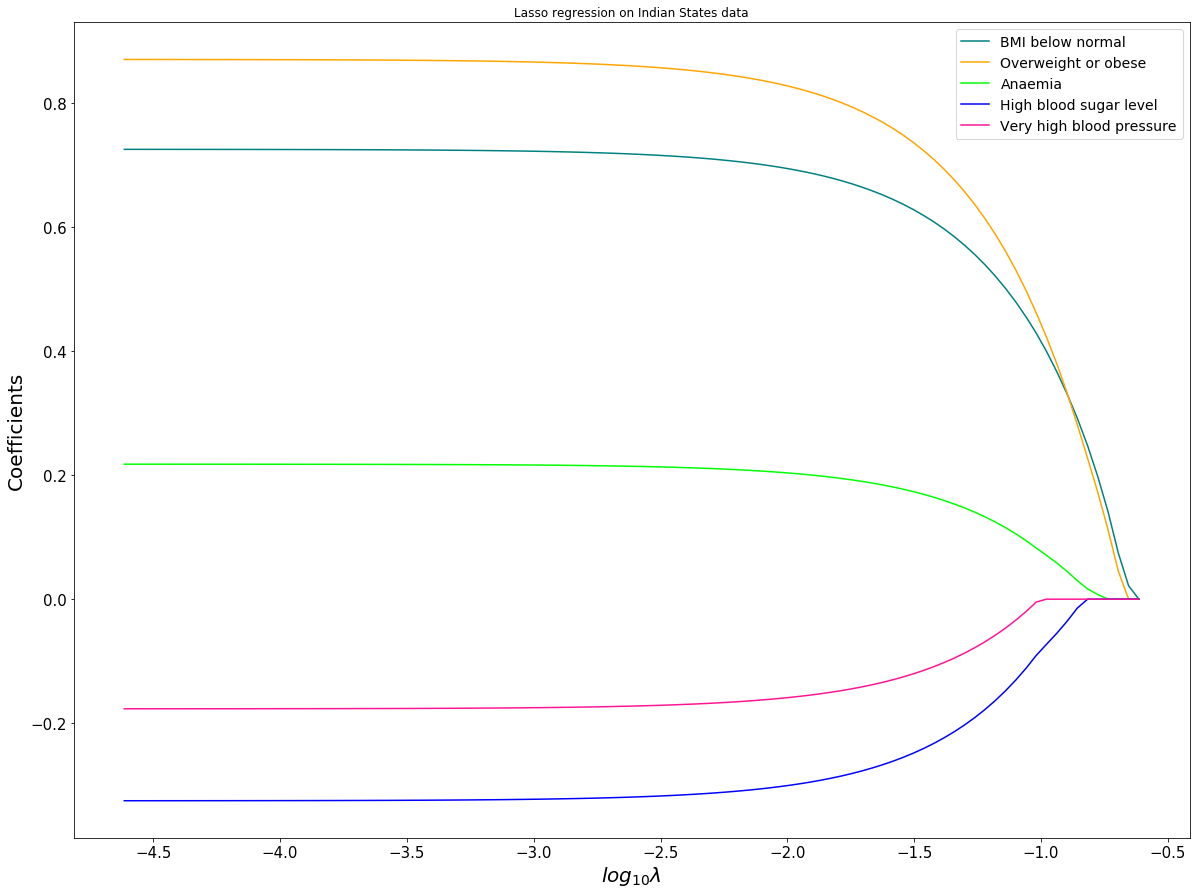

In [12]:
max_alpha = make_lasso_plots(subset, 'Target', 
                ['BMI below normal',
                 'Overweight or obese',
                 'Anaemia',
                 'High blood sugar level',
                 'Very high blood pressure'], 
                ['BMI below normal',
                 'Overweight or obese',
                 'Anaemia',
                 'High blood sugar level',
                 'Very high blood pressure'],
                'Lasso regression on Indian States data')

# Target = ND * NW / ( NC * NT)

## ND - Number of Deaths
## NT - Number of Tests
## NC - Number of Cases
## NW - Population

In [13]:
subset['Target'] = subset['Deceased'] * subset['Population'] / (subset['Confirmed'] * subset['Number of Tests'])
subset['testing_rate'] = subset['Number of Tests'] / subset['Population']
subset.head()

,State,Confirmed,Active,Recovered,Deceased,BMI below normal,Overweight or obese,Anaemia,High blood sugar level,Very high blood pressure,Number of Tests,Population,Target,testing_rate
0,Gujarat,75911,13425,59750,2736,24.564305,20.277778,21.813417,7.487130,0.771684,577500,55108127,3.439339,0.010479
1,Maharashtra,592706,149751,422524,20119,20.107447,22.351736,18.179767,6.175186,0.855639,1223019,101944429,2.829420,0.011997
2,Rajasthan,60872,13745,46274,853,22.470946,13.667653,16.130627,5.591923,0.529626,1760006,58876911,0.468773,0.029893
3,Kerala,37651,13681,23754,163,8.703005,28.157455,10.959093,13.284556,0.447344,294142,25497770,0.375281,0.011536
4,Haryana,46376,6266,39562,548,10.724124,20.310445,20.441979,6.080319,0.639620,602552,22413059,0.439535,0.026884


max R2 : 0.45534088517068
log(alpha corresponding to max R2) : -4.335577400912423
alpha corresponding to max R2 : 4.61766687492243e-05


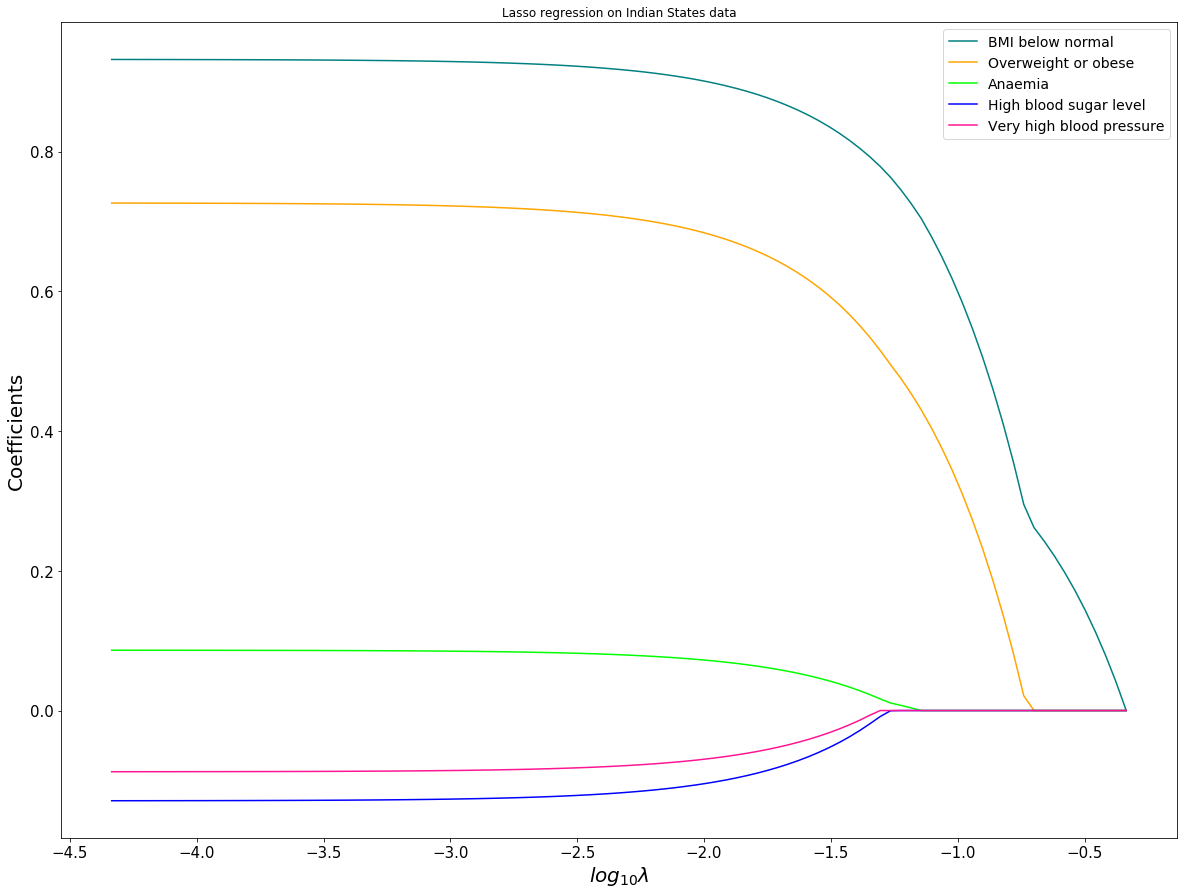

In [14]:
max_alpha = make_lasso_plots(subset, 'Target', 
                ['BMI below normal',
                 'Overweight or obese',
                 'Anaemia',
                 'High blood sugar level',
                 'Very high blood pressure'], 
                ['BMI below normal',
                 'Overweight or obese',
                 'Anaemia',
                 'High blood sugar level',
                 'Very high blood pressure'],
                'Lasso regression on Indian States data')

In [15]:
subset['Confirmed'].sum()

1741242

In [16]:
subset['Deceased'].sum()

40420

In [17]:
subset['Number of Tests'].sum()

16758697